In [68]:
%matplotlib inline
%config InlineBackend.format_data="retina"
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn,optim
import numpy as np

In [30]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
trainset= datasets.FashionMNIST("~/pytorch/F_MNIST_data/", download = True , train = True , transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle = True)

In [31]:
testset = datasets.FashionMNIST("~/pytorch/F_MNIST_data",train = False, download =- True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [32]:
dataiter = iter(trainloader)
images,lables = dataiter.next()
print(type(images))
print(images.shape)
print(lables.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [60]:
import torch.nn.functional as F
class classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x),dim = 1)
        return x

In [61]:
model

classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [62]:
model = classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.003)

In [65]:
epoches = 15
for e in range (epoches):
    running_loss = 0
    for images, labels in trainloader:
        ps = model(images)
        loss = criterion(ps,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss : {running_loss/len(trainloader)}")

Training loss : 0.2318572723693939
Training loss : 0.2312750161281908
Training loss : 0.22376701418461323
Training loss : 0.22443902964340345
Training loss : 0.21260473995145832
Training loss : 0.21061181736939244
Training loss : 0.2119288057096795
Training loss : 0.2102506120464822
Training loss : 0.19905817177869492
Training loss : 0.20176817850072756
Training loss : 0.20168271158406856
Training loss : 0.19629410732942604
Training loss : 0.1932518424184274
Training loss : 0.19080005832779
Training loss : 0.1880923790662591


In [72]:
def view_classify(img, ps, version="Fashion"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


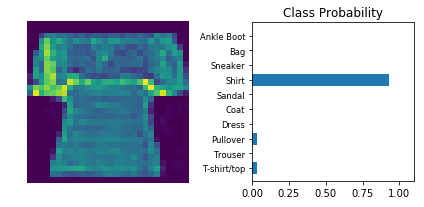

In [73]:
img = images[0].view(1,784)
with torch.no_grad():
    logps = model(img)
    ps = torch.exp(logps)
    view_classify(img.view(1,28,28),ps)